In [67]:
import pandas as pd

# File paths (update to cleaned directory)
sentiment_fp = '../data/cleaned/unified_crypto_sentiment_2024_2025.csv'
whale_fp = '../data/cleaned/whale_activity_2024_2025_sorted.csv'

# Load data
df_sentiment = pd.read_csv(sentiment_fp)
df_whale = pd.read_csv(whale_fp)

print("SENTIMENT DATA COLUMNS:")
print(df_sentiment.columns)
display(df_sentiment.head())

print("\nWHALE ACTIVITY DATA COLUMNS:")
print(df_whale.columns)
display(df_whale.head())


SENTIMENT DATA COLUMNS:
Index(['timestamp', 'coin', 'sentiment', 'polarity', 'source', 'text'], dtype='object')


,timestamp,coin,sentiment,polarity,source,text
0,2024-01-01 12:14:00,ADA,0.7096,positive,Cryptopanic,Cardano (ADA) Skyrockets in This Bullish Metri...
1,2024-01-01 14:00:00,BTC,0.0000,neutral,Cryptopanic,4 altcoins to buy under $1 for start of 2024 A...
2,2024-01-01 14:00:00,ADA,0.0000,neutral,Cryptopanic,4 altcoins to buy under $1 for start of 2024 A...
3,2024-01-01 14:00:00,XRP,0.0000,neutral,Cryptopanic,4 altcoins to buy under $1 for start of 2024 A...
4,2024-01-01 14:00:00,MATIC,0.0000,neutral,Cryptopanic,4 altcoins to buy under $1 for start of 2024 A...



WHALE ACTIVITY DATA COLUMNS:
Index(['coin', 'blockchain', 'time_range', 'whale_transaction_count',
       'total_volume'],
      dtype='object')


,coin,blockchain,time_range,whale_transaction_count,total_volume
0,BTC,Bitcoin,2025-07-30 23:00:00,12,18443.12
1,ETH,Ethereum,2025-07-30 23:00:00,13,17328.87
2,ADA,Cardano,2025-07-30 23:00:00,2,510.85
3,BTC,Bitcoin,2025-07-30 22:00:00,10,36444.73
4,ETH,Ethereum,2025-07-30 22:00:00,17,8040.17


In [68]:
#We want both datasets:
#To have the same time column name (timestamp)
#The same format (datetime)
#And aggregated by hour and coin
# Standardize and convert time columns to datetime
#6.1. Standardize Timestamp Columns
df_sentiment['timestamp'] = pd.to_datetime(df_sentiment['timestamp'])
df_whale['timestamp'] = pd.to_datetime(df_whale['time_range'])  # rename for join/merge


In [69]:
#6.2. Aggregate Data by Hour and Coin
#Sentiment: Average Sentiment per Coin per Hour

sentiment_agg = (
    df_sentiment.groupby([pd.Grouper(key='timestamp', freq='h'), 'coin'])
    .agg({
        'sentiment': 'mean',   # or 'sum' if you prefer, but 'mean' is common for sentiment
        'polarity': lambda x: x.value_counts().index[0] if len(x) > 0 else None, # most common
    })
    .reset_index()
)


In [70]:
#6.2. Aggregate Data by Hour and Coin
#Whale Activity: Sum Activity per Coin per Hour
whale_agg = (
    df_whale.groupby([pd.Grouper(key='timestamp', freq='h'), 'coin'])
    .agg({
        'whale_transaction_count': 'sum',
        'total_volume': 'sum'
    })
    .reset_index()
)


In [71]:
#6.3 Merge for Analysis
# Merge on ['timestamp', 'coin']
merged = pd.merge(
    sentiment_agg,
    whale_agg,
    on=['timestamp', 'coin'],
    how='outer',  # keep all data, can use 'inner' to keep only matched rows
    suffixes=('_sentiment', '_whale')
).sort_values(['coin', 'timestamp']).reset_index(drop=True)


In [72]:
#6.4 Preview Result
display(merged.head(10))
print(merged.columns)


,timestamp,coin,sentiment,polarity,whale_transaction_count,total_volume
0,2025-04-22 12:00:00,$1,0.3818,positive,NaN,NaN
1,2025-04-22 15:00:00,$1,0.0000,neutral,NaN,NaN
2,2025-04-25 12:00:00,$ELON,0.3612,positive,NaN,NaN
3,2025-05-07 13:00:00,00,0.8126,positive,NaN,NaN
4,2024-04-05 07:00:00,AAVE,-0.4215,negative,NaN,NaN
5,2024-10-10 12:00:00,AAVE,0.3506,positive,NaN,NaN
6,2024-12-12 12:00:00,AAVE,0.9100,positive,NaN,NaN
7,2024-12-12 16:00:00,AAVE,0.8271,positive,NaN,NaN
8,2024-12-17 12:00:00,AAVE,-0.4767,negative,NaN,NaN
9,2025-01-22 14:00:00,AAVE,0.0000,neutral,NaN,NaN


Index(['timestamp', 'coin', 'sentiment', 'polarity', 'whale_transaction_count',
       'total_volume'],
      dtype='object')


In [73]:
#Coins for each DATA SET (Whales VS Sentiment)
print("Whale activity coins:", df_whale['coin'].unique())
print("Sentiment coins:", df_sentiment['coin'].unique())


Whale activity coins: ['BTC' 'ETH' 'ADA' 'SOL' 'BNB']
Sentiment coins: ['ADA' 'BTC' 'XRP' 'MATIC' 'ALGO' 'ETH' 'GRT' 'DOGE' 'SOL' 'OP' 'DOT'
 'CRO' 'MKR' 'SHIB' 'ICP' 'APT' 'OSMO' 'EGLD' 'HBAR' 'SUI' 'ATOM' 'LINK'
 'AVAX' 'MANA' 'LDO' 'LTC' 'FLOW' 'KCS' 'DAI' 'XLM' 'IMX' 'ARB' 'BNB'
 'CAKE' 'INJ' 'TIA' 'SEI' 'FTM' 'USDT' 'USDC' 'XMR' 'BLUR' 'DYDX' 'RLY'
 'JST' 'WBTC' 'TRX' 'USDP' 'PYTH' 'ASTR' 'FLOKI' 'REQ' 'TWT' 'IOTA' 'PHB'
 'CORE' 'JOE' 'XVG' 'SCRT' 'T' 'CELO' 'DFI' 'BUSD' 'JUP' 'ORCA' 'DEFI'
 'RUNE' 'UNI' 'STX' 'ENS' 'LUSD' 'RON' 'PEPE' 'NFT' 'DAO' 'TUSD' 'RAY'
 'GMT' 'OM' 'BONK' 'COTI' 'ARK' 'WOO' 'ZEC' 'VET' 'KSM' 'FIL' 'ORDI'
 'AGIX' 'WLD' 'XOR' 'META' 'CHZ' 'SAND' 'BEAM' 'STRK' 'CSPR' 'BAT' 'SNEK'
 'AR' 'DUSK' 'BTG' 'BICO' 'RNDR' 'WIF' 'TON' 'AGI' 'ATH' 'TRUMP' 'EPS'
 'FDUSD' 'LUNC' 'GMX' 'GALA' 'STORJ' 'CFX' 'FET' 'BCH' 'ETC' 'ETN' 'BONE'
 'MNT' 'VC' 'OCEAN' 'XTZ' 'ALPHA' 'SRM' 'W' 'ENA' 'PYUSD' 'AAVE' 'BRETT'
 'WMT' 'ONDO' 'BGB' 'OKB' 'XAUT' 'XNO' 'BOME' 'TAO' 'NEAR' 'AKT' 'K

In [74]:
# Filter Sentiment Data for Whales' Coins
# Get only the coins tracked in whale data
focus_coins = df_whale['coin'].unique()
df_sentiment_focus = df_sentiment[df_sentiment['coin'].isin(focus_coins)]

In [75]:
# Re-Aggregate Sentiment Data
sentiment_agg = (
    df_sentiment_focus.groupby([pd.Grouper(key='timestamp', freq='h'), 'coin'])
    .agg({
        'sentiment': 'mean',
        'polarity': lambda x: x.value_counts().index[0] if len(x) > 0 else None,
    })
    .reset_index()
)

In [76]:
# Merge Again
merged = pd.merge(
    sentiment_agg,
    whale_agg,
    on=['timestamp', 'coin'],
    how='outer',
    suffixes=('_sentiment', '_whale')
).sort_values(['coin', 'timestamp']).reset_index(drop=True)
display(merged.head(10))

,timestamp,coin,sentiment,polarity,whale_transaction_count,total_volume
0,2024-01-01 03:00:00,ADA,NaN,NaN,5.0,1458.28
1,2024-01-01 04:00:00,ADA,NaN,NaN,5.0,1367.81
2,2024-01-01 06:00:00,ADA,NaN,NaN,4.0,1394.08
3,2024-01-01 08:00:00,ADA,NaN,NaN,8.0,1262.00
4,2024-01-01 10:00:00,ADA,NaN,NaN,2.0,800.95
5,2024-01-01 11:00:00,ADA,NaN,NaN,7.0,1653.56
6,2024-01-01 12:00:00,ADA,0.7096,positive,3.0,1476.93
7,2024-01-01 13:00:00,ADA,NaN,NaN,10.0,1507.22
8,2024-01-01 14:00:00,ADA,0.0000,neutral,NaN,NaN
9,2024-01-01 16:00:00,ADA,NaN,NaN,10.0,928.07


In [77]:
# Only keep rows where both sentiment and whale data are present (no NaN in either set of columns)
df_matched = merged.dropna(subset=['sentiment', 'whale_transaction_count', 'total_volume'])

display(df_matched.head(20))  # show first 20 matching rows
print(f"Number of matched rows: {len(df_matched)}")

,timestamp,coin,sentiment,polarity,whale_transaction_count,total_volume
6,2024-01-01 12:00:00,ADA,0.7096,positive,3.0,1476.93
41,2024-01-03 13:00:00,ADA,0.9325,positive,5.0,1284.20
65,2024-01-04 18:00:00,ADA,0.8860,positive,8.0,1340.75
104,2024-01-06 20:00:00,ADA,0.3818,positive,5.0,805.82
131,2024-01-08 19:00:00,ADA,0.6124,positive,5.0,874.18
162,2024-01-10 16:00:00,ADA,0.3182,positive,9.0,1133.18
177,2024-01-11 12:00:00,ADA,0.8225,positive,2.0,1268.85
203,2024-01-12 20:00:00,ADA,0.0000,neutral,5.0,796.80
266,2024-01-16 16:00:00,ADA,-0.7964,negative,7.0,1662.51
294,2024-01-18 13:00:00,ADA,0.8979,positive,8.0,1375.75


Number of matched rows: 4775


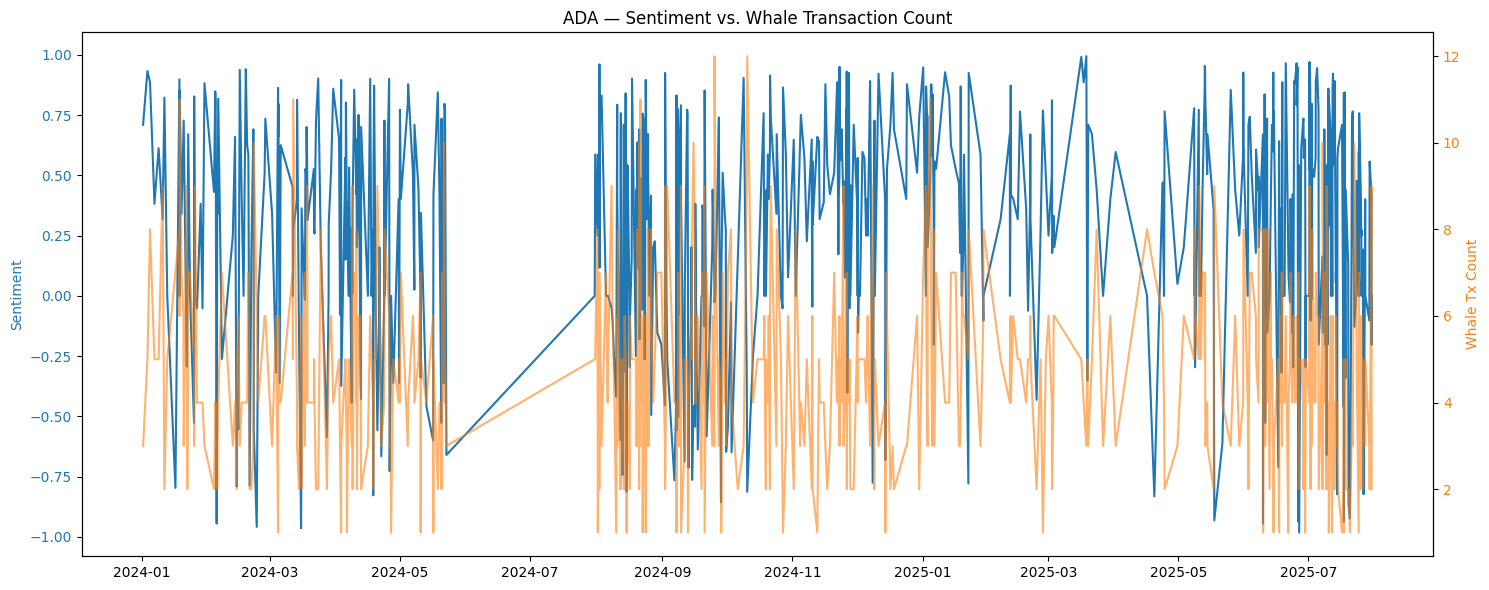

In [78]:
#A. Time Series Visualization (ADA)
import matplotlib.pyplot as plt

# Filter for one coin (e.g., ADA)
coin = 'ADA'
dfc = df_matched[df_matched['coin'] == coin].sort_values('timestamp')

fig, ax1 = plt.subplots(figsize=(15,6))

ax1.plot(dfc['timestamp'], dfc['sentiment'], color='tab:blue', label='Sentiment')
ax1.set_ylabel('Sentiment', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(dfc['timestamp'], dfc['whale_transaction_count'], color='tab:orange', alpha=0.6, label='Whale Tx Count')
ax2.set_ylabel('Whale Tx Count', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title(f"{coin} — Sentiment vs. Whale Transaction Count")
fig.tight_layout()
plt.show()


In [79]:
#For a better view 1.2
window = 24  # Try 24 for hourly, or 7 for daily (adjust if needed)
dfc['sentiment_smooth'] = dfc['sentiment'].rolling(window, min_periods=1, center=True).mean()
dfc['whale_smooth'] = dfc['whale_transaction_count'].rolling(window, min_periods=1, center=True).mean()


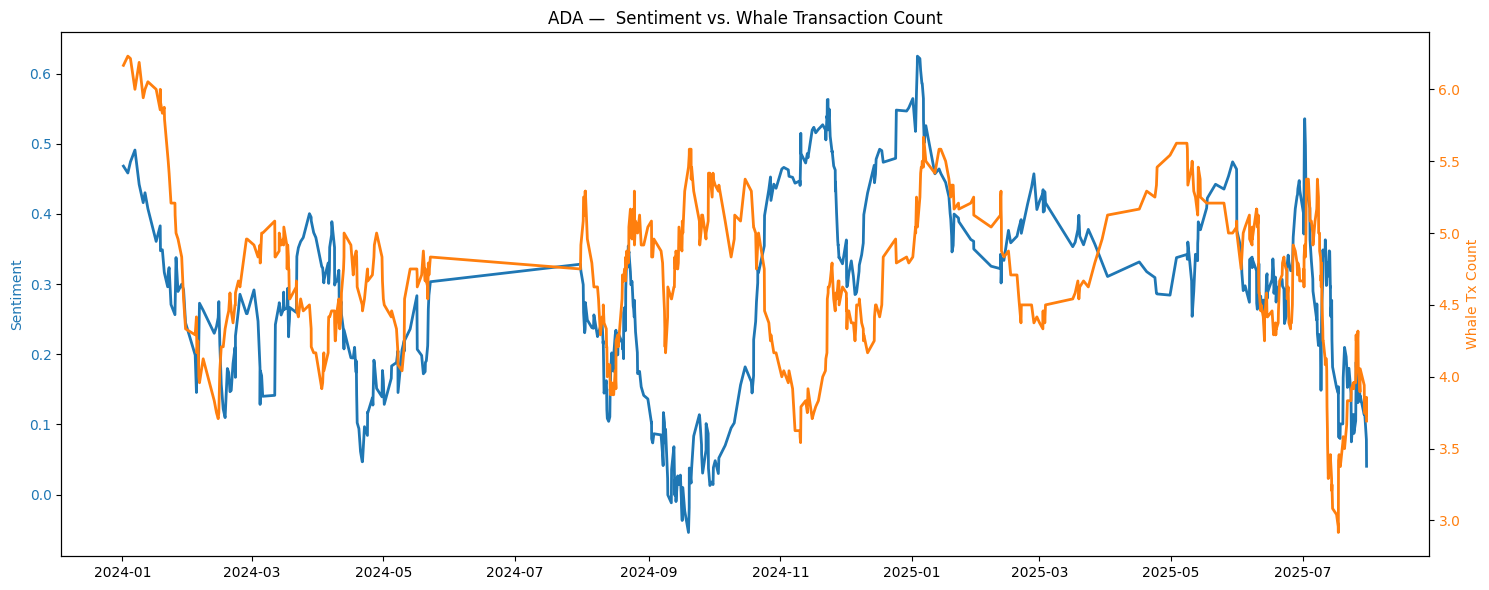

In [80]:
#For a better view 2.2
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

ax1 = plt.gca()
ax1.plot(dfc['timestamp'], dfc['sentiment_smooth'], color='tab:blue', linewidth=2, label='Sentiment (smoothed)')
ax1.set_ylabel('Sentiment', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(dfc['timestamp'], dfc['whale_smooth'], color='tab:orange', linewidth=2, label='Whale Tx Count (smoothed)')
ax2.set_ylabel('Whale Tx Count', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title(f"{coin} —  Sentiment vs. Whale Transaction Count")
plt.grid(True, which='both', axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


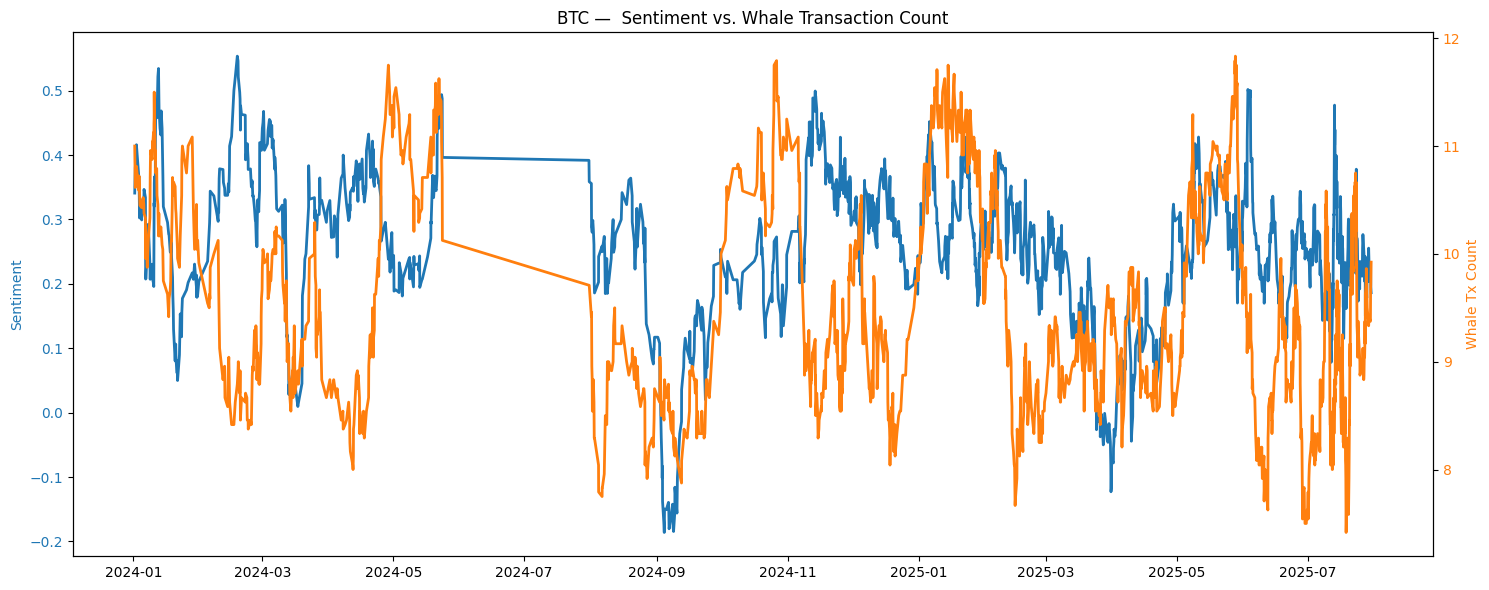

In [81]:
#A. Time Series Visualization ()
# BTC
coin = 'BTC'
dfc = df_matched[df_matched['coin'] == coin].sort_values('timestamp').copy()

window = 24
dfc['sentiment_smooth'] = dfc['sentiment'].rolling(window, min_periods=1, center=True).mean()
dfc['whale_smooth'] = dfc['whale_transaction_count'].rolling(window, min_periods=1, center=True).mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
ax1 = plt.gca()
ax1.plot(dfc['timestamp'], dfc['sentiment_smooth'], color='tab:blue', linewidth=2, label='Sentiment (smoothed)')
ax1.set_ylabel('Sentiment', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(dfc['timestamp'], dfc['whale_smooth'], color='tab:orange', linewidth=2, label='Whale Tx Count (smoothed)')
ax2.set_ylabel('Whale Tx Count', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title(f"{coin} —  Sentiment vs. Whale Transaction Count")
plt.grid(True, which='both', axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()





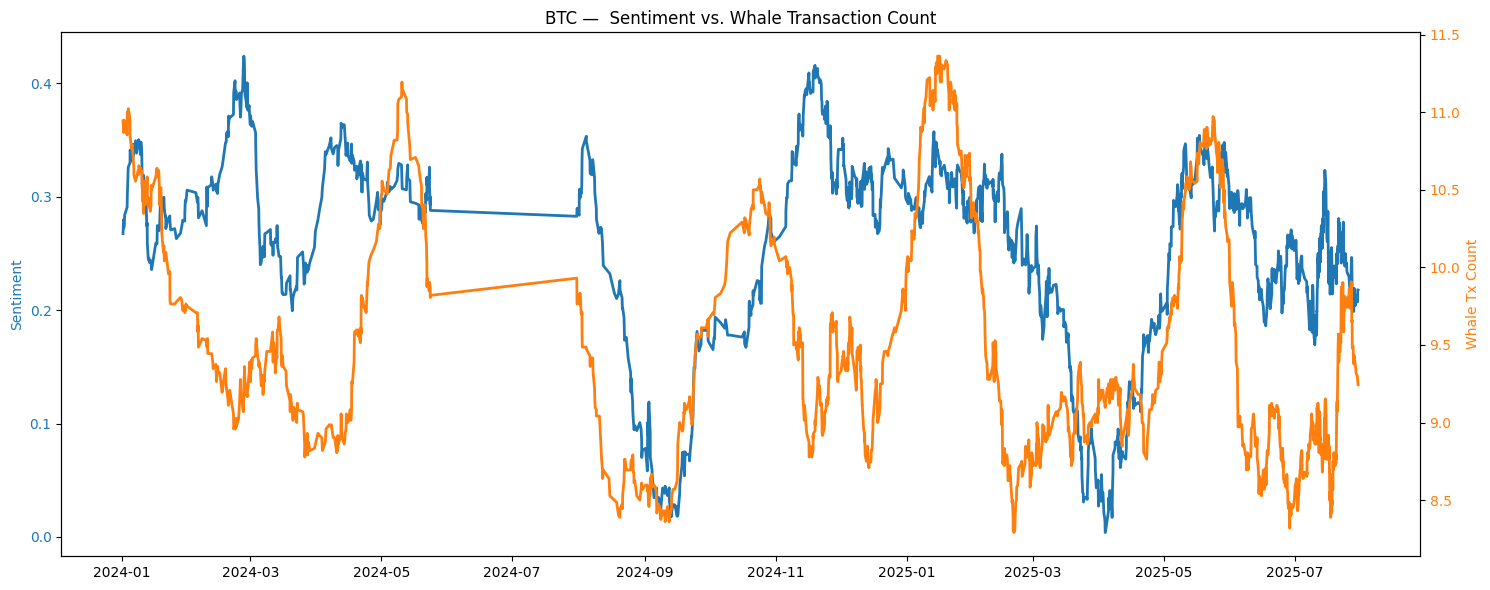

In [82]:
#Smoother view BTC
coin = 'BTC'
dfc = df_matched[df_matched['coin'] == coin].sort_values('timestamp').copy()

window = 72  # Smoother, increase as needed!
dfc['sentiment_smooth'] = dfc['sentiment'].rolling(window, min_periods=1, center=True).mean()
dfc['whale_smooth'] = dfc['whale_transaction_count'].rolling(window, min_periods=1, center=True).mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
ax1 = plt.gca()
ax1.plot(dfc['timestamp'], dfc['sentiment_smooth'], color='tab:blue', linewidth=2, label='Sentiment (smoothed)')
ax1.set_ylabel('Sentiment', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(dfc['timestamp'], dfc['whale_smooth'], color='tab:orange', linewidth=2, label='Whale Tx Count (smoothed)')
ax2.set_ylabel('Whale Tx Count', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title(f"{coin} —  Sentiment vs. Whale Transaction Count")
plt.grid(True, which='both', axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


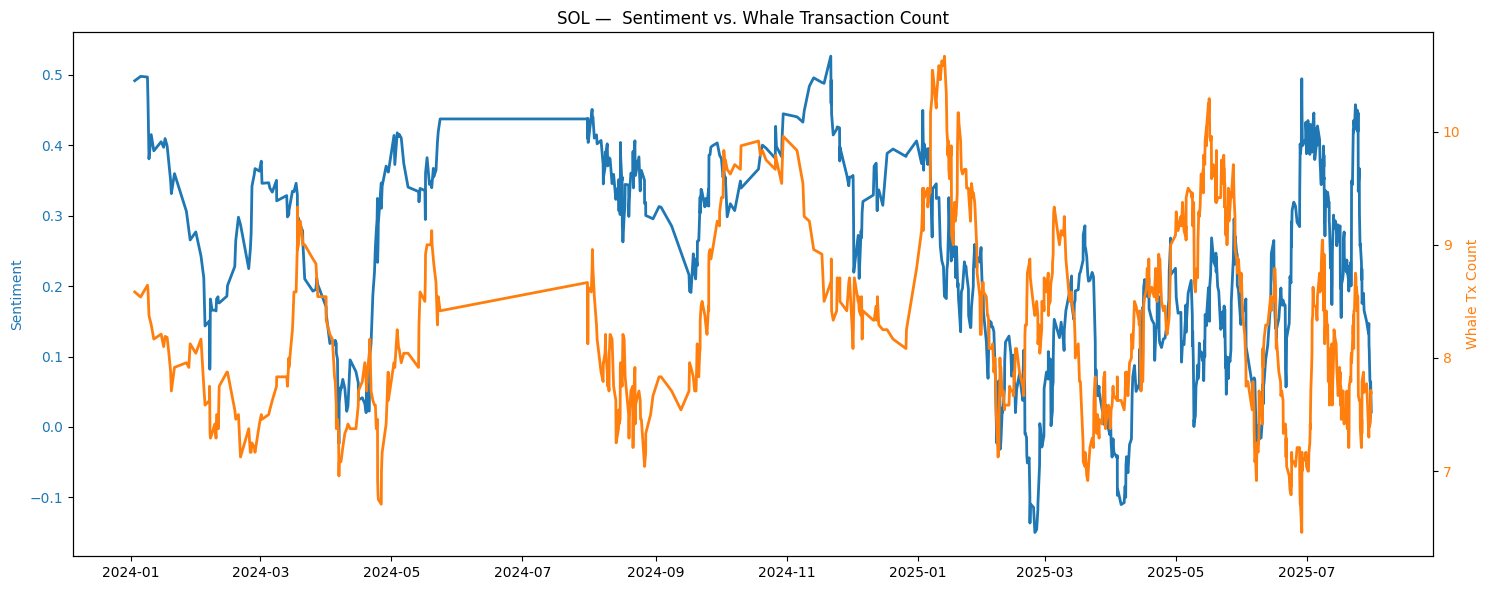

In [83]:
#A. Time Series Visualization (SOL)
# SOL
coin = 'SOL'
dfc = df_matched[df_matched['coin'] == coin].sort_values('timestamp').copy()

window = 24
dfc['sentiment_smooth'] = dfc['sentiment'].rolling(window, min_periods=1, center=True).mean()
dfc['whale_smooth'] = dfc['whale_transaction_count'].rolling(window, min_periods=1, center=True).mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
ax1 = plt.gca()
ax1.plot(dfc['timestamp'], dfc['sentiment_smooth'], color='tab:blue', linewidth=2, label='Sentiment (smoothed)')
ax1.set_ylabel('Sentiment', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(dfc['timestamp'], dfc['whale_smooth'], color='tab:orange', linewidth=2, label='Whale Tx Count (smoothed)')
ax2.set_ylabel('Whale Tx Count', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title(f"{coin} —  Sentiment vs. Whale Transaction Count")
plt.grid(True, which='both', axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


In [84]:
window = 120  # or 168
dfc['sentiment_smooth'] = dfc['sentiment'].rolling(window, min_periods=1, center=True).mean()
dfc['whale_smooth'] = dfc['whale_transaction_count'].rolling(window, min_periods=1, center=True).mean()


In [85]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [86]:
from scipy.signal import savgol_filter

window_length = 121  # must be odd and less than len(dfc)
polyorder = 3

dfc['sentiment_smooth'] = savgol_filter(dfc['sentiment'].fillna(0), window_length, polyorder)
dfc['whale_smooth'] = savgol_filter(dfc['whale_transaction_count'].fillna(0), window_length, polyorder)


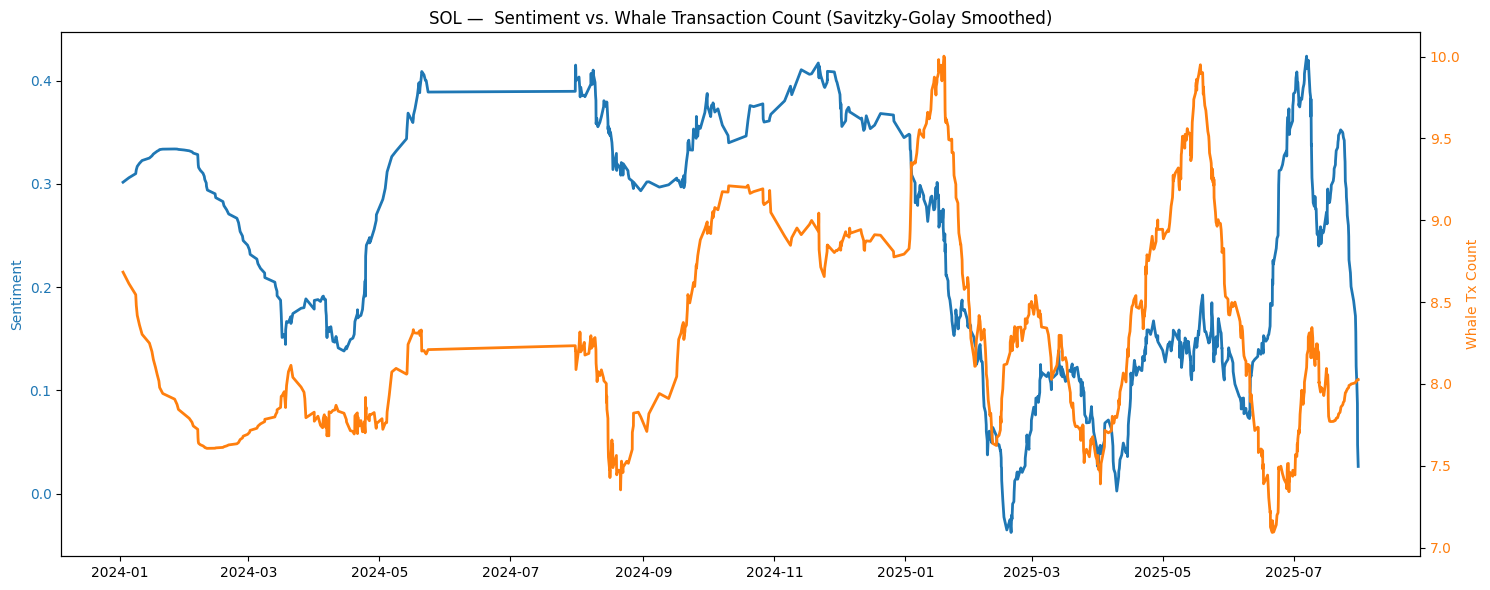

In [87]:
#A. Time Series Visualization (SOL)
# SOL - Using scipy’s Savitzky-Golay filter:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

ax1 = plt.gca()
ax1.plot(dfc['timestamp'], dfc['sentiment_smooth'], color='tab:blue', linewidth=2, label='Sentiment (smoothed)')
ax1.set_ylabel('Sentiment', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(dfc['timestamp'], dfc['whale_smooth'], color='tab:orange', linewidth=2, label='Whale Tx Count (smoothed)')
ax2.set_ylabel('Whale Tx Count', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title(f"{coin} —  Sentiment vs. Whale Transaction Count (Savitzky-Golay Smoothed)")
plt.grid(True, which='both', axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


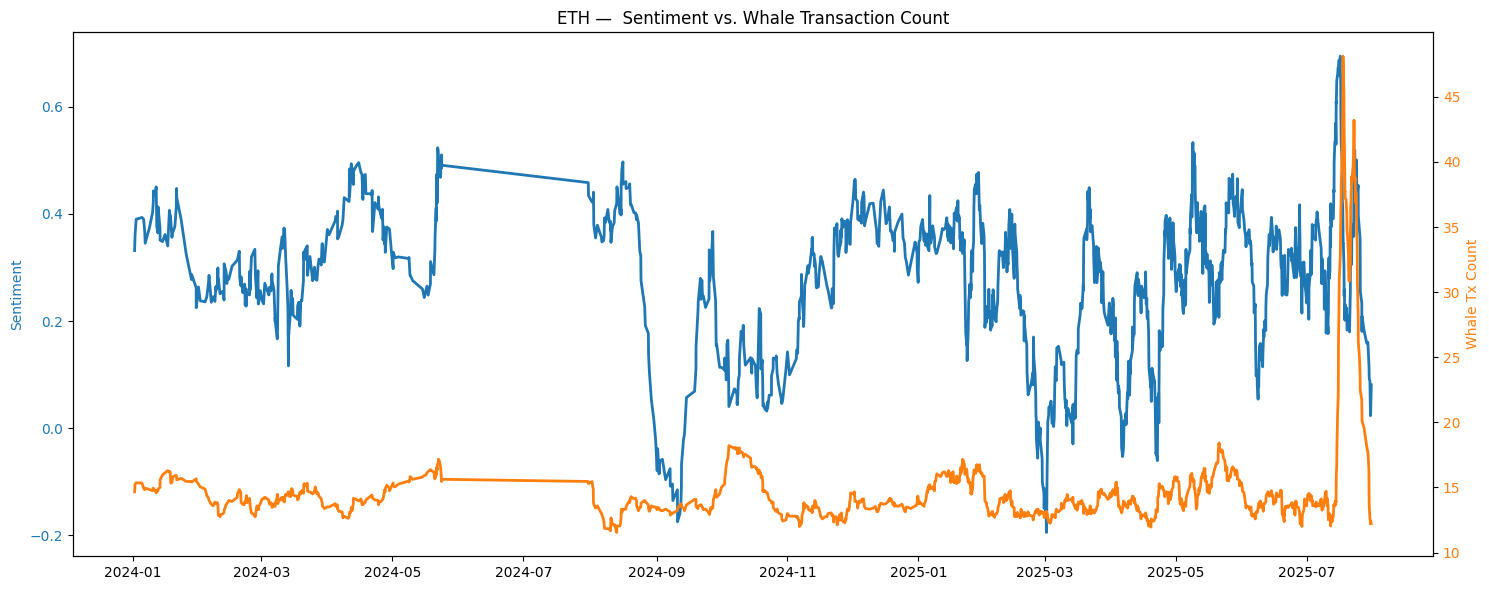

In [88]:
#A. Time Series Visualization (ETH)
# ETH
coin = 'ETH'
dfc = df_matched[df_matched['coin'] == coin].sort_values('timestamp').copy()

window = 24
dfc['sentiment_smooth'] = dfc['sentiment'].rolling(window, min_periods=1, center=True).mean()
dfc['whale_smooth'] = dfc['whale_transaction_count'].rolling(window, min_periods=1, center=True).mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
ax1 = plt.gca()
ax1.plot(dfc['timestamp'], dfc['sentiment_smooth'], color='tab:blue', linewidth=2, label='Sentiment (smoothed)')
ax1.set_ylabel('Sentiment', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(dfc['timestamp'], dfc['whale_smooth'], color='tab:orange', linewidth=2, label='Whale Tx Count (smoothed)')
ax2.set_ylabel('Whale Tx Count', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title(f"{coin} —  Sentiment vs. Whale Transaction Count")
plt.grid(True, which='both', axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


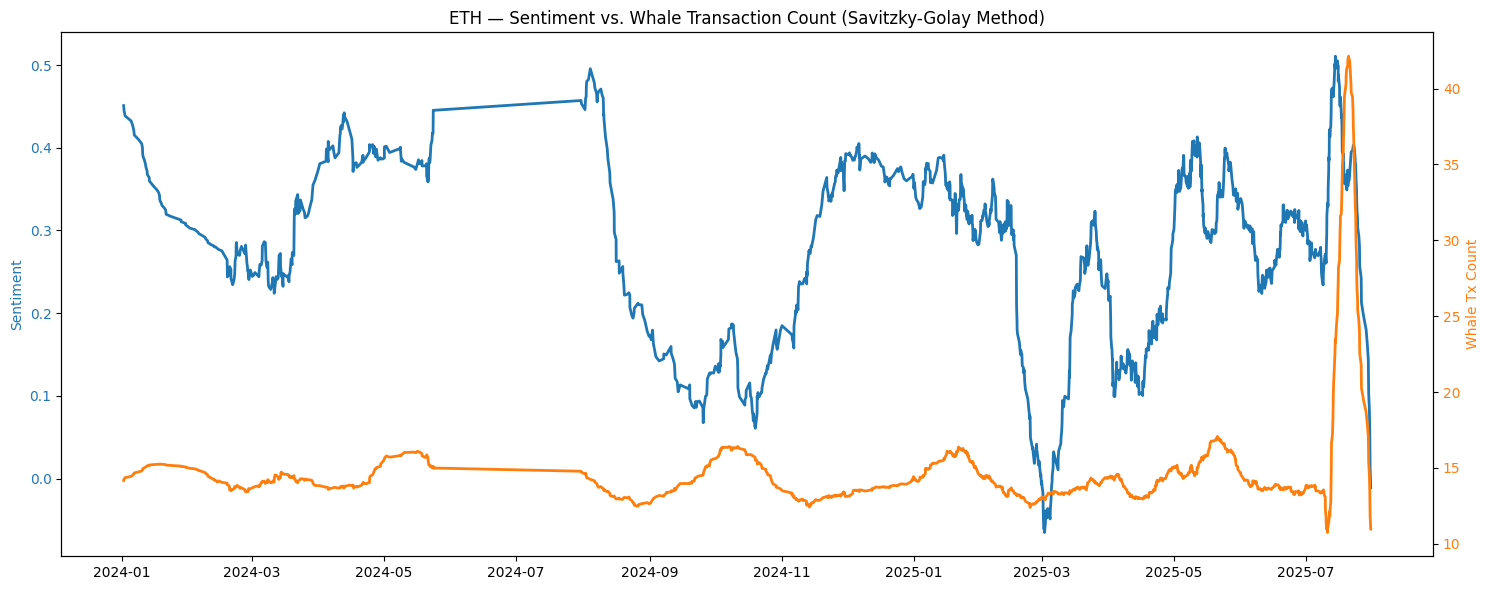

In [89]:
#A. Time Series Visualization (ETH)
#ETH using Savitzky-Golay filter
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# Filter for ETH and sort
coin = 'ETH'
dfc = df_matched[df_matched['coin'] == coin].sort_values('timestamp').copy()

# Choose a window length (must be odd and < len(dfc)), and a polyorder
window_length = 121 if len(dfc) > 121 else (len(dfc)//2)*2+1  # auto-fix window
polyorder = 3

# Apply smoothing
dfc['sentiment_smooth'] = savgol_filter(dfc['sentiment'].fillna(0), window_length, polyorder)
dfc['whale_smooth'] = savgol_filter(dfc['whale_transaction_count'].fillna(0), window_length, polyorder)

# Plot
plt.figure(figsize=(15,6))
ax1 = plt.gca()
ax1.plot(dfc['timestamp'], dfc['sentiment_smooth'], color='tab:blue', linewidth=2, label='Sentiment (smoothed)')
ax1.set_ylabel('Sentiment', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(dfc['timestamp'], dfc['whale_smooth'], color='tab:orange', linewidth=2, label='Whale Tx Count (smoothed)')
ax2.set_ylabel('Whale Tx Count', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title(f"{coin} — Sentiment vs. Whale Transaction Count (Savitzky-Golay Method)")
plt.grid(True, which='both', axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


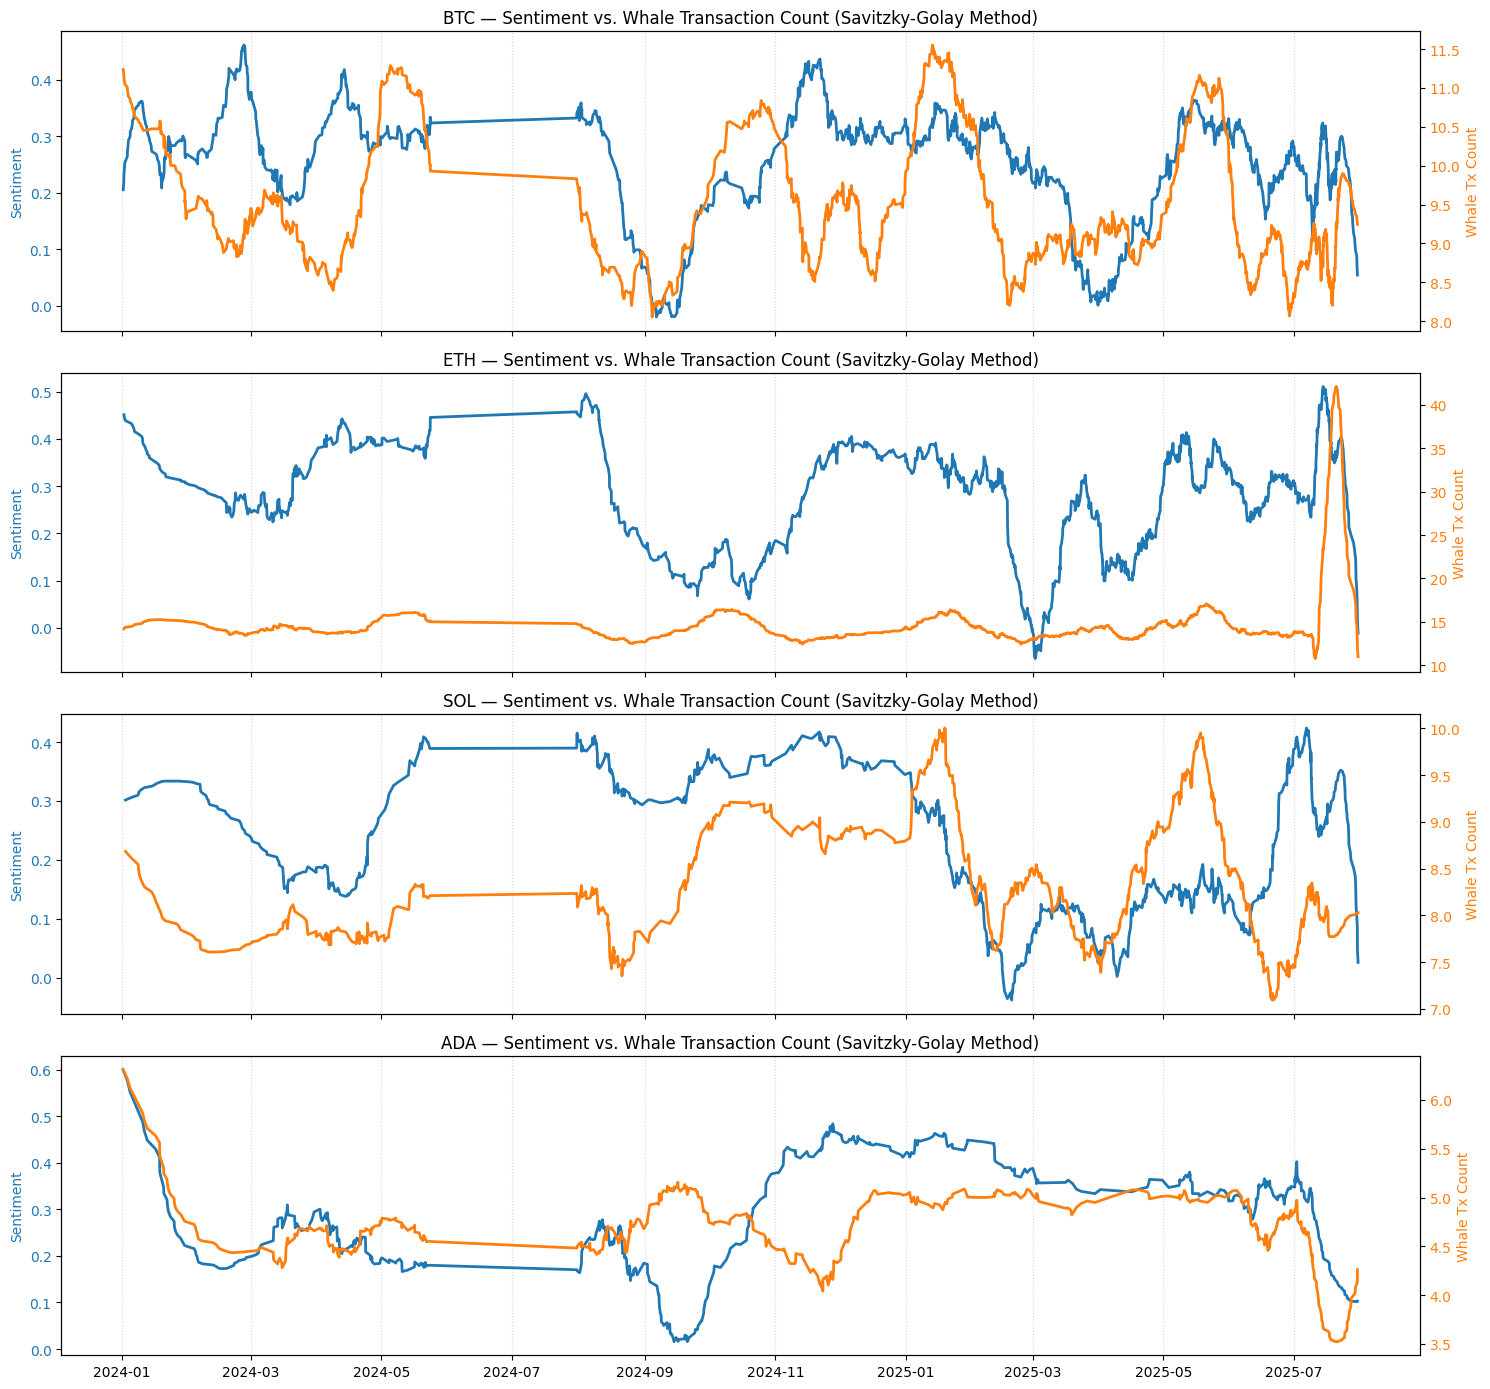

In [90]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

coins = ['BTC', 'ETH', 'SOL', 'ADA']
window_length = 121   # You can increase this if you want even smoother lines
polyorder = 3

fig, axes = plt.subplots(len(coins), 1, figsize=(15, 3.5 * len(coins)), sharex=True)

for idx, coin in enumerate(coins):
    ax1 = axes[idx]
    dfc = df_matched[df_matched['coin'] == coin].sort_values('timestamp').copy()
    
    # Ensure window is valid for short coins
    win = window_length if len(dfc) > window_length else (len(dfc)//2)*2+1

    # Apply Savitzky-Golay smoothing
    dfc['sentiment_smooth'] = savgol_filter(dfc['sentiment'].fillna(0), win, polyorder)
    dfc['whale_smooth'] = savgol_filter(dfc['whale_transaction_count'].fillna(0), win, polyorder)
    
    ax1.plot(dfc['timestamp'], dfc['sentiment_smooth'], color='tab:blue', linewidth=2, label='Sentiment')
    ax1.set_ylabel('Sentiment', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    ax2 = ax1.twinx()
    ax2.plot(dfc['timestamp'], dfc['whale_smooth'], color='tab:orange', linewidth=2, label='Whale Tx Count')
    ax2.set_ylabel('Whale Tx Count', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')
    
    ax1.set_title(f"{coin} — Sentiment vs. Whale Transaction Count (Savitzky-Golay Method)")
    ax1.grid(True, axis='x', linestyle=':', alpha=0.5)
    
plt.tight_layout()
plt.show()


In [94]:
#B. Correlation and Lag-Lead Analysis
#1. Correlation with No Lag
from scipy.stats import pearsonr

for coin in ['BTC', 'ETH', 'SOL', 'ADA']:
    dfc = df_matched[df_matched['coin'] == coin].sort_values('timestamp').copy()
    # Use Savitzky-Golay smoothing as before, or rolling mean
    win = 121 if len(dfc) > 121 else (len(dfc)//2)*2+1
    dfc['sentiment_smooth'] = savgol_filter(dfc['sentiment'].fillna(0), win, 3)
    dfc['whale_smooth'] = savgol_filter(dfc['whale_transaction_count'].fillna(0), win, 3)
    # Drop NA
    dfc = dfc.dropna(subset=['sentiment_smooth', 'whale_smooth'])
    # Correlation
    corr, pval = pearsonr(dfc['sentiment_smooth'], dfc['whale_smooth'])
    print(f"{coin}: Correlation (no lag): {corr:.3f}, p-value: {pval:.3e}")

BTC: Correlation (no lag): 0.317, p-value: 1.115e-40
ETH: Correlation (no lag): 0.302, p-value: 1.347e-33
SOL: Correlation (no lag): -0.004, p-value: 9.012e-01
ADA: Correlation (no lag): 0.233, p-value: 2.934e-09


In [ ]:
"""
BTC: Correlation (no lag): 0.317 (p-value ≪ 0.05, highly significant)

ETH: Correlation (no lag): 0.302 (p-value ≪ 0.05, highly significant)

SOL: Correlation (no lag): -0.004 (p-value ≫ 0.05, not significant)

ADA: Correlation (no lag): 0.233 (p-value ≪ 0.05, highly significant)

Interpretation in Plain English
BTC, ETH, ADA:
There is a moderate, positive, and highly significant correlation between sentiment and whale activity when there is no time lag. This means that as whale activity increases, sentiment tends to be more positive at the same time (or vice versa).

“This could suggest real-time interplay or co-movement between large whale actions and market sentiment among retail participants.”

SOL:
The correlation is nearly zero and not statistically significant (p = 0.901).

“For Solana, there appears to be no immediate, direct relationship between sentiment and whale activity. The two move independently, at least at the same moment in time.”

#Interpretation of correlation:
The correlation value shows how strongly two variables move together.
Positive value (e.g., 0.3): When one rises, the other tends to rise (moderate positive link).
Negative value (e.g., -0.3): When one rises, the other tends to fall (moderate negative link).
Zero (0): No relationship.

#Interval of correlation values:
Correlation values range from -1 to +1:
+1 = perfect positive relationship
0 = no relationship
-1 = perfect negative relationship

#Interpretation of P-value:
P-value < 0.05: The correlation is statistically significant (unlikely to be due to random chance).
P-value ≥ 0.05: The correlation is not statistically significant (could easily be due to random chance).

#Interval of P-values:
P-value always ranges from 0 to 1.
The most common significance threshold is 0.05.

"""

'\nBTC: Correlation (no lag): 0.317 (p-value ≪ 0.05, highly significant)\n\nETH: Correlation (no lag): 0.302 (p-value ≪ 0.05, highly significant)\n\nSOL: Correlation (no lag): -0.004 (p-value ≫ 0.05, not significant)\n\nADA: Correlation (no lag): 0.233 (p-value ≪ 0.05, highly significant)\n\nInterpretation in Plain English\nBTC, ETH, ADA:\nThere is a moderate, positive, and highly significant correlation between sentiment and whale activity when there is no time lag. This means that as whale activity increases, sentiment tends to be more positive at the same time (or vice versa).\n\n“This could suggest real-time interplay or co-movement between large whale actions and market sentiment among retail participants.”\n\nSOL:\nThe correlation is nearly zero and not statistically significant (p = 0.901).\n\n“For Solana, there appears to be no immediate, direct relationship between sentiment and whale activity. The two move independently, at least at the same moment in time.”\n\n#Interpretatio

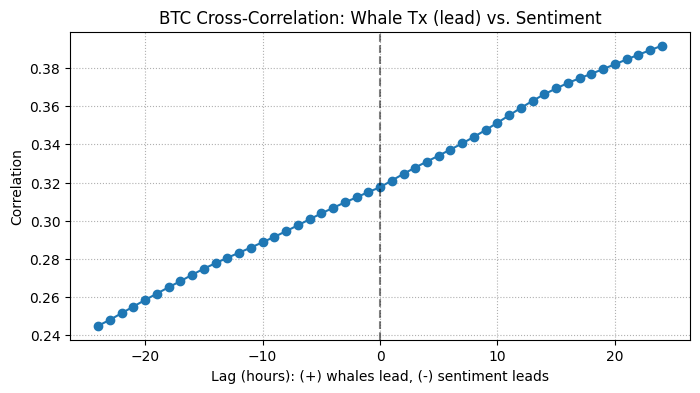

BTC: Max absolute correlation = 0.392 at lag 24


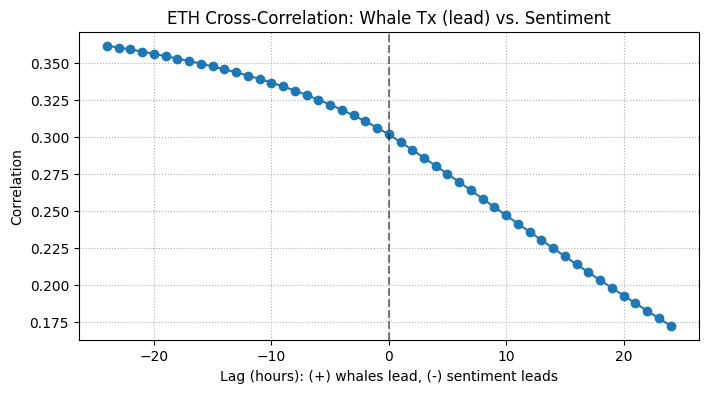

ETH: Max absolute correlation = 0.362 at lag -24


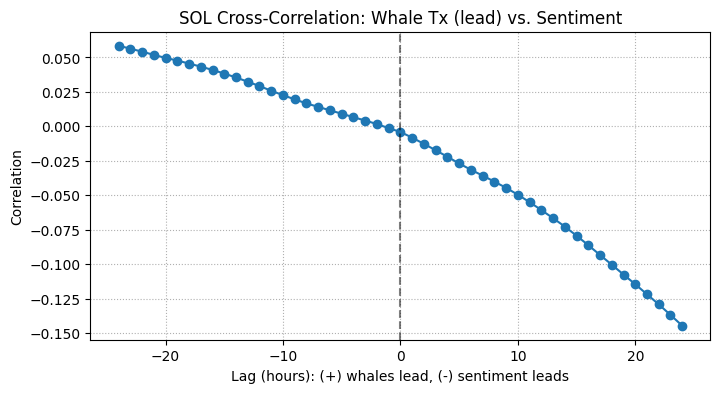

SOL: Max absolute correlation = 0.145 at lag 24


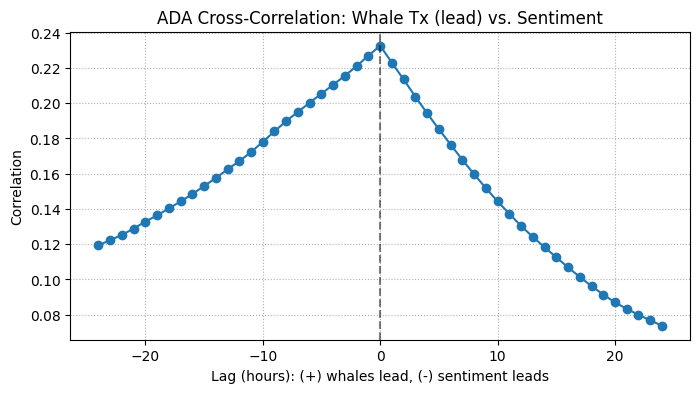

ADA: Max absolute correlation = 0.233 at lag 0


In [95]:
##B. Correlation and Lag-Lead Analysis
#2. Cross-Correlation with Time Lag
import numpy as np

def cross_corr_lag(series1, series2, max_lag=24):
    """Returns correlation coefficients for lags from -max_lag to +max_lag"""
    corr_lags = []
    lags = range(-max_lag, max_lag + 1)
    for lag in lags:
        if lag < 0:
            s1 = series1[-lag:]
            s2 = series2[:lag]
        elif lag > 0:
            s1 = series1[:-lag]
            s2 = series2[lag:]
        else:
            s1 = series1
            s2 = series2
        corr = np.corrcoef(s1, s2)[0,1]
        corr_lags.append(corr)
    return lags, corr_lags

import matplotlib.pyplot as plt

for coin in ['BTC', 'ETH', 'SOL', 'ADA']:
    dfc = df_matched[df_matched['coin'] == coin].sort_values('timestamp').copy()
    win = 121 if len(dfc) > 121 else (len(dfc)//2)*2+1
    dfc['sentiment_smooth'] = savgol_filter(dfc['sentiment'].fillna(0), win, 3)
    dfc['whale_smooth'] = savgol_filter(dfc['whale_transaction_count'].fillna(0), win, 3)
    dfc = dfc.dropna(subset=['sentiment_smooth', 'whale_smooth'])
    # Cross-correlation
    lags, corr_lags = cross_corr_lag(dfc['whale_smooth'].values, dfc['sentiment_smooth'].values, max_lag=24)
    plt.figure(figsize=(8,4))
    plt.plot(lags, corr_lags, marker='o')
    plt.axvline(0, color='k', linestyle='--', alpha=0.5)
    plt.title(f"{coin} Cross-Correlation: Whale Tx (lead) vs. Sentiment")
    plt.xlabel('Lag (hours): (+) whales lead, (-) sentiment leads')
    plt.ylabel('Correlation')
    plt.grid(True, linestyle=':')
    plt.show()
    max_corr = np.max(np.abs(corr_lags))
    best_lag = lags[np.argmax(np.abs(corr_lags))]
    print(f"{coin}: Max absolute correlation = {max_corr:.3f} at lag {best_lag}")



In [ ]:
"""
Lag-Lead Analysis: Interpretation of Results
**1. BTC:

Maximum correlation: 0.392 at lag +24 (hours).

Interpretation: Whale activity leads sentiment by 24 hours. This suggests that significant whale transactions are followed by shifts in public/retail sentiment (e.g., on Twitter, Reddit, or news) about a day later. In other words, whales may be influencing or “leading” the crowd in the Bitcoin market.

**2. ETH:

Maximum correlation: 0.362 at lag -24.

Interpretation: Sentiment leads whale activity by 24 hours. Here, the data suggests that changes in retail sentiment precede large whale transactions for Ethereum. In this case, whales might be reacting to the general mood or discussion in the market.

**3. SOL:

Maximum correlation: 0.145 at lag +24.

Interpretation: Whale activity leads sentiment by 24 hours, but the relationship is weaker than with BTC. There is still some evidence that whales might be influencing sentiment for Solana, but the effect is not very strong.

**4. ADA:

Maximum correlation: 0.233 at lag 0.

Interpretation: Sentiment and whale activity are most strongly correlated with no time lag. This suggests that whale activity and sentiment move together in real-time for Cardano, with no clear leader or follower.

How to Present This in Your Thesis
Explain cross-correlation: “Cross-correlation analysis was conducted to determine whether whale activity leads or lags retail sentiment for each coin.”

Interpret the sign and value of the lag:

Positive lag: Whale activity occurs before changes in sentiment (whales lead).

Negative lag: Sentiment changes occur before whale activity (sentiment leads).

Lag = 0: Sentiment and whale activity move simultaneously.

Highlight differences between coins: “The results suggest that the relationship between whale behavior and sentiment differs across coins. For BTC and SOL, whale actions tend to precede retail sentiment, while for ETH, retail sentiment seems to lead whale activity. For ADA, both move together.”

General Statement for Your Thesis
“The cross-correlation analysis reveals that for Bitcoin and Solana, large on-chain whale transactions tend to lead public sentiment by approximately one day, indicating a potential causal influence of whales on retail mood. In contrast, for Ethereum, sentiment changes in the community precede whale activity, suggesting whales may react to public opinion. For Cardano, both move together, with no clear leader. These findings indicate a nuanced and coin-specific relationship between market sentiment and whale behavior.”

"""

In [ ]:
"""

“For Cardano, both the no-lag and lagged analyses indicate that sentiment and whale activity are most strongly related when measured at
 the same time, with no evidence of one leading the other. For Solana, there is no significant relationship at lag zero, but a weak delayed 
 correlation at a 24-hour lag suggests whale actions may have a minor influence on subsequent sentiment, albeit not strongly.
 "albeit not strongly" = "but only a little" or "but the effect is weak"”
"""

In [ ]:
""" 
#TO AVOID CONFUSIONS FOR SOL AND ADA:
1. No Lag Correlation
Measures the relationship when both variables are compared at exactly the same time (hour by hour, or day by day).

If correlation is high and significant at lag 0, they move together in real-time.

ADA Example:
Correlation = 0.233 at lag 0 → ADA's sentiment and whale activity rise and fall together in the same time window.
2. Lagged (Cross-Correlation)
Measures if one variable predicts or precedes the other, by shifting one variable forward/backward in time.
If maximum correlation occurs at a positive lag, it means whale activity leads sentiment.
If at a negative lag, sentiment leads whale activity.
If at lag 0, they move together (no clear leader).

SOL Example:
No-lag correlation ≈ 0, not significant → At the same time, sentiment and whale activity are independent.
Maximum correlation = 0.145 at lag +24 → But, if you look one day after a whale move, sentiment does show a (weak) tendency to follow.
(The relationship is weak, so you should not over-interpret.)

How They Go Together
The no-lag analysis answers: “Do these two series move together right now?”
The lag analysis answers: “Does one lead or predict the other, possibly with a delay?”

For some coins (like ADA), both point to simultaneous movement.
For others (like SOL), there’s no simultaneous link, but a delayed, weak influence exists.

"""